In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from time import sleep
from tqdm import tqdm

esercizio 2

In [3]:
N_systems = 10000
L_system = 40
systems = np.zeros((N_systems, L_system))

for i in range(N_systems):
    for j in range(L_system):
        systems[i][j] = random.choice([-1,1])

def hamiltonian(system):
    h = 0
    for i in range(system.size-1):
        h -= system[i]*system[i+1]
    #because it's periodic
    h -= system[system.size-1]*system[0]
    return h

#calculating hamiltonian of each system
h_array = np.zeros(N_systems)
for i in range(h_array.size):
    h_array[i] = hamiltonian(systems[i])

In [4]:
#constructing the features matrix for sklearn
X = []
for i in range(N_systems):
    temp = []
    for j in range(L_system):
        for k in range(L_system):
            temp.append(systems[i][j]*systems[i][k])
    X.append(temp)

y = h_array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linear = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

# Chooose grid for regularization parameter
alphas = np.logspace(-2, 6, 20)

coefs_linear = []
coefs_ridge = []
coefs_lasso = []

train_errors_linear = []
test_errors_linear = []
train_errors_ridge = []
test_errors_ridge = []
train_errors_lasso = []
test_errors_lasso = []

 #linear regression
linear.fit(X_train, y_train)
coefs_linear.append(linear.coef_)
    
train_errors_linear.append(linear.score(X_train, y_train))
test_errors_linear.append(linear.score(X_test, y_test))

for i in tqdm(range(alphas.size)):
    a = alphas[i]

    #ridge regression
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    #lasso regression
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))

100%|██████████| 20/20 [01:16<00:00,  3.82s/it]


In [ ]:
#grammian is singular
X_train = np.array(X_train)
np.linalg.inv(X_train.T@X_train)

LinAlgError: Singular matrix

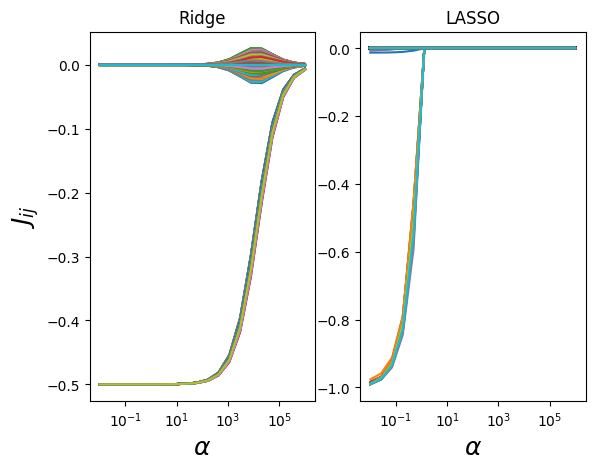

In [6]:
# displaying results
plt.subplot(1,2,1)
plt.semilogx(alphas, coefs_ridge)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$J_{ij}$',fontsize=18)
plt.title('Ridge')

plt.subplot(1,2,2)
plt.semilogx(alphas, coefs_lasso)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.title('LASSO')

plt.savefig("relazione/immagini/params_ex2", dpi = 800)

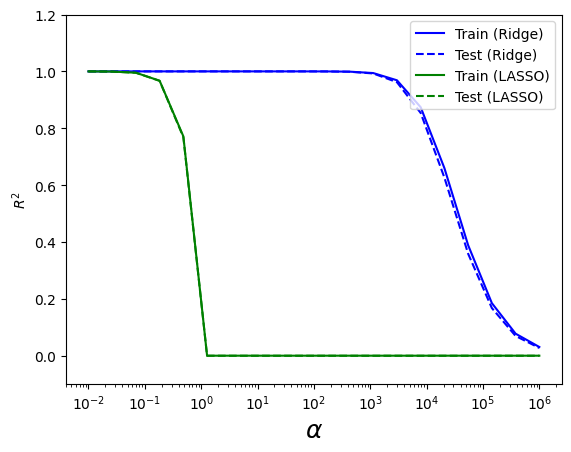

In [7]:
# Plot our performance on both the training and test data
fig, ax = plt.subplots()

plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')

plt.legend(loc='upper right')
plt.ylim([-0.1, 1.2])
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$R^2$')
plt.savefig("relazione/immagini/error_ex2", dpi = 800)

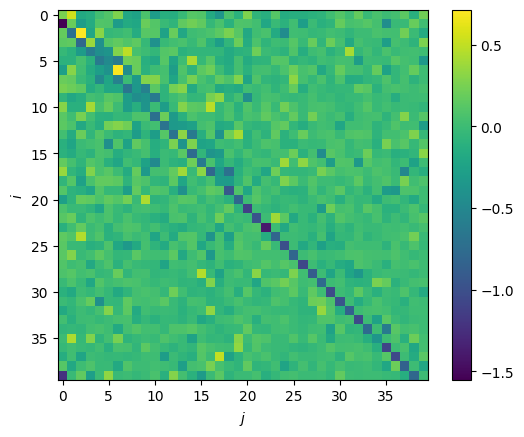

In [ ]:
plt.imshow(np.array(coefs_linear).reshape(40, 40))
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.savefig("relazione/immagini/linear_params", dpi = 800)

alpha =  1.2742749857031335


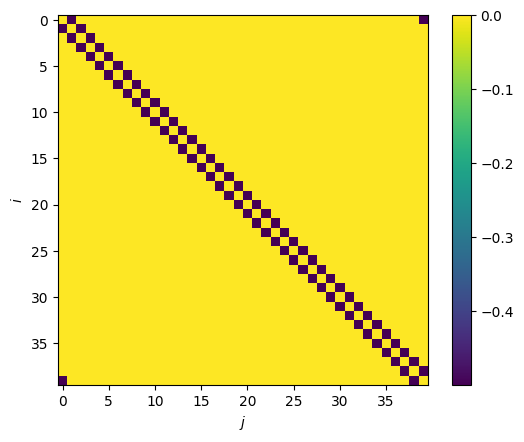

In [ ]:
index = 5
plt.imshow(coefs_ridge[index].reshape(40, 40))
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
print("alpha = ", alphas[index])
plt.savefig("relazione/immagini/ridge_params", dpi = 800)

alpha =  0.06951927961775606


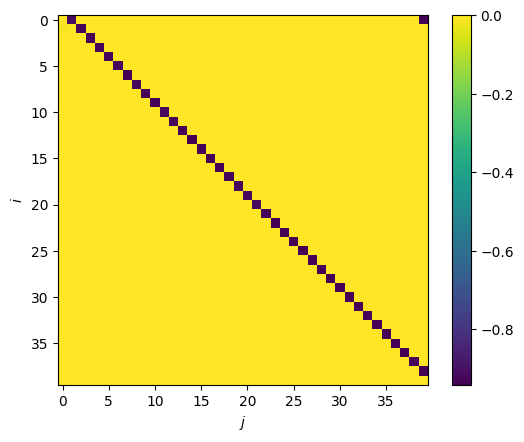

In [ ]:
index = 2
plt.imshow(coefs_lasso[index].reshape(40, 40))
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
print("alpha = ", alphas[index])
plt.savefig("relazione/immagini/lasso_params", dpi = 800)